In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [32]:
mu = 0.1
yaw = 0
normal = np.array([0,0,1])

min_force = 1
max_force = 10

C =              np.array([[1,          0,         -mu * normal[2]],#*np.cos(yaw)],
                           [0,          1,         -mu * normal[2]],#*np.sin(yaw)],
                           [0,          1,          mu * normal[2]],#*np.sin(yaw)],
                           [1,          0,          mu * normal[2]],#*np.cos(yaw)],
                           [normal[0],  normal[1],       normal[2]] 
                          ])

d_min = np.array([[- 100000000,  # large negative number, in theory - inf
                   - 100000000,  # large negative number, in theory - inf
                   0,
                   0,
                   min_force]])
 

d_max = np.array([[ 0,
                    0,
                    100000000,  # large positive number, in theory  inf
                    100000000,  # large positive number, in theory  inf
                    max_force]])


In [33]:
NUM_POINTS = 100
fx = np.linspace(-10, 10, NUM_POINTS)
fy = np.linspace(-10, 10, NUM_POINTS)
fz = np.linspace(-10, 10, NUM_POINTS)

Fx, Fy, Fz = np.meshgrid(fx, fy, fz)
#Fx, Fy = np.meshgrid(fx, fy)

Fx = np.ravel(Fx)
Fy = np.ravel(Fy)
Fz = np.ravel(Fz)
F = np.vstack([Fx, Fy, Fz])

In [34]:
def getValidIx(ineq):
    ix1 = np.where(ineq[0,:] >= 0 )[0]
    ix2 = np.where(ineq[1,:] >= 0 )[0]
    ix3 = np.where(ineq[2,:] >= 0 )[0]
    ix4 = np.where(ineq[3,:] >= 0 )[0]
    ix5 = np.where(ineq[4,:] >= 0 )[0]
    
        
    ix12 = np.intersect1d(ix1,  ix2)
    ix34 = np.intersect1d(ix3,  ix4)
    ix14 = np.intersect1d(ix12, ix34)
    ix   = np.intersect1d(ix14, ix5)
    
    print(ix.shape)
    return ix
    

min_ineq =  C.dot(F) - d_min.T
max_ineq =  C.dot(F) - d_max.T

ix_valid_min = getValidIx(min_ineq)
ix_valid_max = getValidIx(-max_ineq)

ix_valid = np.intersect1d(ix_valid_min, ix_valid_max)



print(ix_valid.shape)


(125425,)
(250850,)
(1700,)


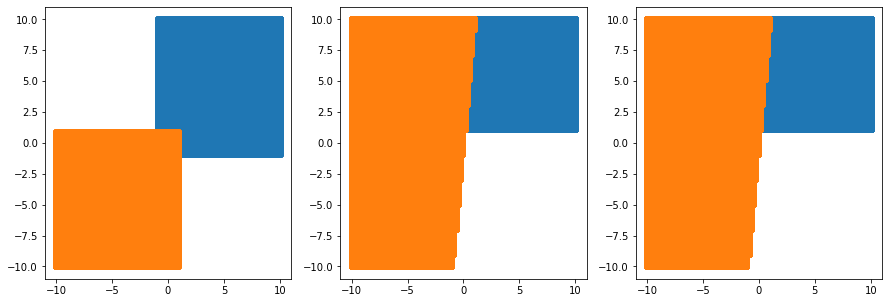

In [35]:
fig, axes = plt.subplots(1,3,figsize = (15,5))

axes[0].scatter(Fx[ix_valid_min], Fy[ix_valid_min])
axes[0].scatter(Fx[ix_valid_max], Fy[ix_valid_max])

axes[1].scatter(Fx[ix_valid_min], Fz[ix_valid_min])
axes[1].scatter(Fx[ix_valid_max], Fz[ix_valid_max])

axes[2].scatter(Fy[ix_valid_min], Fz[ix_valid_min])
axes[2].scatter(Fy[ix_valid_max], Fz[ix_valid_max])

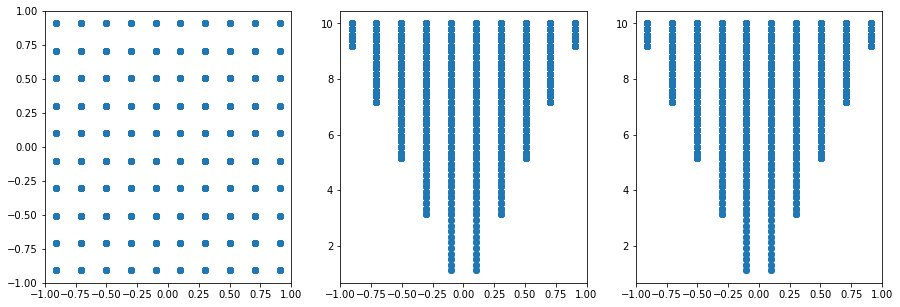

In [36]:
fig, axes = plt.subplots(1,3,figsize = (15,5))

axes[0].scatter(Fx[ix_valid], Fy[ix_valid])
axes[1].scatter(Fx[ix_valid], Fz[ix_valid])
axes[2].scatter(Fy[ix_valid], Fz[ix_valid])


In [ ]:
C.dot(F).shape, d_min.T.shape

In [ ]:
ix_valid = np.where( np.logical_and(, C.dot(F) < d_max.T))[0].shape

In [ ]:
ix_valid.shape